In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/fer2013/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data["emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [6]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [7]:
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [8]:
def plot_data(data, classes):
  
  values = data["emotion"].value_counts().sort_index(ascending=True)
  colors = ["green", "blue", "crimson", "pink", "orange", "yellow", "purple"]

  plt.figure(figsize=[12, 5])
  
  plt.bar(x=classes, height=values, color=colors, edgecolor='black')

  plt.xlabel("Emotions")
  plt.ylabel("Amount")
  plt.title("Amount of emotions")
  plt.show();

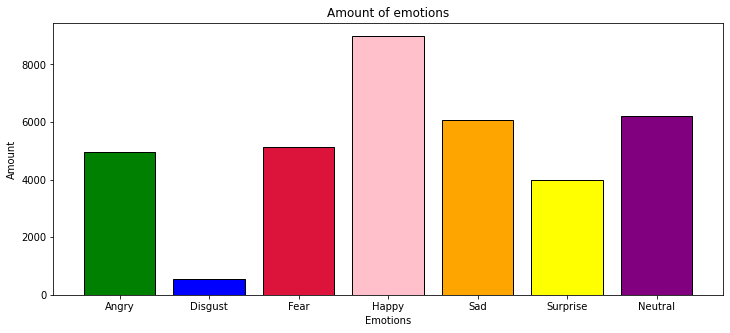

In [9]:
plot_data(data, class_names)

In [10]:
data.isna().value_counts()

emotion  pixels  Usage
False    False   False    35887
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


Data preprosesing

In [12]:
data = data[data["emotion"] != 1]
data = data[data["emotion"] != 2]
data = data[data["emotion"] != 6]
data["emotion"].value_counts().reset_index(drop=True, inplace=True)

In [13]:
data[:10]

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
10,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
14,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training
15,5,107 107 109 109 109 109 110 101 123 140 144 14...,Training
16,3,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...,Training


In [14]:
# Split data into X & y
X = data.drop("emotion", axis=1)
y = data["emotion"]

# Concat train sets into one
df = pd.concat([X, y], axis=1)

In [15]:
df["emotion"].value_counts()

3    8989
4    6077
0    4953
5    4002
Name: emotion, dtype: int64

In [16]:
# A few functions to help us process our pixels
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'float64')
    return array

def image_reshape(data):
    image = np.reshape(data.to_list(),(data.shape[0],48,48,1))
    image = np.repeat(image, 3, -1)
    return image

In [17]:
df['pixels'] = df["pixels"].apply(pixels_to_array)

In [18]:
data_train = df[df["Usage"] == "Training"]
data_test1 = df[df["Usage"] == "PublicTest"]
data_test2 = df[df["Usage"] == "PrivateTest"]
data_test = pd.concat([data_test1, data_test2])

In [19]:
X_train = image_reshape(data_train["pixels"])
X_test = image_reshape(data_test["pixels"])
y_train = data_train["emotion"]
y_test = data_test["emotion"]

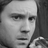

In [20]:
from google.colab.patches import cv2_imshow

cv2_imshow(X_train[0])

In [21]:
!mkdir data
!mkdir data/train
!mkdir data/test

In [22]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [23]:
for i in range(len(y_train)):
  if y_train[i] == 3:
    y_train[i] = 1
  elif y_train[i] == 4:
    y_train[i] = 2
  elif y_train[i] == 5:
    y_train[i] = 3

for i in range(len(y_test)):
  if y_test[i] == 3:
    y_test[i] = 1
  elif y_test[i] == 4:
    y_test[i] = 2
  elif y_test[i] == 5:
    y_test[i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [24]:
import cv2
import os

def put_in_dir(X_train, X_test, y_train, y_test, classes):
  """
  Takes data and dir to put images in directory.

  Args:

    data (np.array): Images
    dir (str): Directory to put images

  Returns:
    Images in the specified directory;

  """
  for label in range(len(classes)):
    os.makedirs("/content/data/train/" + classes[label], exist_ok=True)
    os.makedirs("/content/data/test/" + classes[label], exist_ok=True)

  for i in range(len(X_train)):
    emotion = classes[y_train[i]]
    cv2.imwrite(f"/content/data/train/{emotion}/{emotion}{i}.png", X_train[i])

  for j in range(len(X_test)):
    emotion = classes[y_test[j]]
    cv2.imwrite(f"/content/data/test/{emotion}/{emotion}{j}.png", X_test[j])

In [25]:
class_names = ["Angry", "Happy", "Sad", "Surprise"]

In [26]:
put_in_dir(X_train, X_test, y_train, y_test, class_names)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (48, 48)
BATCH_SIZE = 64

train_dir = "/content/data/train/"
test_dir =  "/content/data/test/"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.1,
                                   zoom_range=0.1)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=IMAGE_SHAPE,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical",
                                                shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 19211 images belonging to 4 classes.
Found 4810 images belonging to 4 classes.


Building the model -> CNN

In [28]:
# Import packages 
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [1]:
# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = Sequential([
  tf.keras.layers.Input(shape=(48, 48, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
model_1.fit(train_data, epochs=80, callbacks=[reduce_lr, checkpoint_callback], validation_data=test_data)

NameError: ignored

In [ ]:
model_1.save("model.h5")

In [ ]:
!zip -r /content/file.zip /content/checkpoint